# **Figure 4 Treatment**

### Program: 
[Jupyter notebook >=5.5, Python >=3.4]

### Input: 
- averaged normalized XANES spectra per particle for each sample, type = .csv (tab-delimited), [dataset33] ()
> c_2017_MH0170_5_vals_133to137_date_1.csv <br> 
c_2017_SKA2102_8_vals_194to195_date_1.csv

- averaged normalized XANES spectra per particle for each sample, type = .csv (tab-delimited), [dataset43] ()
> c_2018_MH0264X07b_vals_38to39_date_1.csv <br> 
c_2018_S18500_vals_34to39_date_1.csv <br> 
c_2018_S18506_vals_16to22_date_1.csv

### Steps:
- follow script below

### Output:
- Figure 4, type = .svg or .pdf, [Figure4] ()
> Figure4_date_1

### Notes:
- all comments are made with '##' 
- aspects that can be changed depending on the sample, etc. are with '#'

### Additional Notes:
- Figure layout and extra labels were accomplished in [Inkscape 0.92.4] (https://inkscape.org/)

In [1]:
%pylab inline
import imageio
import numpy as np
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
##standards for figures
SMALL_SIZE = 24
MEDIUM_SIZE = 24
BIGGER_SIZE = 24

s=100
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
##prepare output
date = datetime.datetime.now().strftime("%Y%m%d")
try:
    os.mkdir('Figure_4')
except OSError:
    pass

In [4]:
##enter the figure name here that will be the filename for the image of the figure output below
FIG_name = 'Figure4_{}_'.format(date)  ## underscore at end to allow indexing when saving below
FIG_name

'Figure4_20190724_'

In [5]:
##enter date of file creation... (None means last date)
file_selection = [('c_2017_MH0170_5_vals_133to137', None),
                  ('c_2017_SKA2102_8_vals_194to195', None),
                  ('c_2018_MH0264X07b_vals_038to039', None),
                  ('c_2018_S18500_vals_034to039', None),
                  ('c_2018_S18506_vals_016to022', None)]
files = [glob(os.path.join('dataset_33',
              '{}_{}_*.csv'.format(filename, (date if date else '*'))))[-1]
              for filename, date in file_selection[:2]] + \
        [glob(os.path.join('dataset_43',
              '{}_{}_*.csv'.format(filename, (date if date else '*'))))[-1]
              for filename, date in file_selection[2:]]

files

['dataset_33\\c_2017_MH0170_5_vals_133to137_20190717_1.csv',
 'dataset_33\\c_2017_SKA2102_8_vals_194to195_20190717_1.csv',
 'dataset_43\\c_2018_MH0264X07b_vals_038to039_20190724_1.csv',
 'dataset_43\\c_2018_S18500_vals_034to039_20190717_1.csv',
 'dataset_43\\c_2018_S18506_vals_016to022_20190717_1.csv']

In [6]:
sample_names = [os.path.basename(i).split('_', 4)[2] for i in files]
sample_name = sample_names[0] ##doesn't matter which
sample_names

['MH0170', 'SKA2102', 'MH0264X07b', 'S18500', 'S18506']

In [7]:
files_cut = [os.path.basename(i)[:-15] for i in files]  ##cuts off 15 characters from the end, so ends with scan numbers
files_cut

['c_2017_MH0170_5_vals_133to137',
 'c_2017_SKA2102_8_vals_194to195',
 'c_2018_MH0264X07b_vals_038to039',
 'c_2018_S18500_vals_034to039',
 'c_2018_S18506_vals_016to022']

In [8]:
spec_2017_1 = pd.read_csv(files[0], delimiter=',', header=0, index_col = ['energy'], usecols=['energy','mean'])
spec_2017_2 = pd.read_csv(files[1], delimiter=',', header=0, index_col = ['energy'], usecols=['energy','mean'])
frames_2017 = [spec_2017_1, spec_2017_2]

In [9]:
all_data_17 = pd.concat(frames_2017, axis=1)
all_data_17.index.name = 'energy'
all_data_17.columns = sample_names[0:2]
all_data_17

,MH0170,SKA2102
energy,,
2460.09,-0.002623,-0.001787
2460.28,-0.002443,0.000897
2460.47,-0.001065,-0.005814
2460.66,-0.001878,-0.008538
2460.85,-0.003719,-0.007302
2461.04,-0.003153,-0.002707
2461.23,-0.002792,0.004182
2461.42,-0.004559,-0.002996
2461.61,-0.000958,0.005310


In [10]:
spec_2018_1 = pd.read_csv(files[2], delimiter=',', header=0, index_col = ['energy'], usecols=['energy','mean'])
spec_2018_2 = pd.read_csv(files[3], delimiter=',', header=0, index_col = ['energy'], usecols=['energy','mean'])
spec_2018_3 = pd.read_csv(files[4], delimiter=',', header=0, index_col = ['energy'], usecols=['energy','mean'])
frames_2018 = [spec_2018_1, spec_2018_2, spec_2018_3]

In [11]:
all_data_18 = pd.concat(frames_2018, axis=1)
all_data_18.index.name = 'energy'
all_data_18.columns = sample_names[2:5]
all_data_18

,MH0264X07b,S18500,S18506
energy,,,
2463.12,-0.004761,-0.003635,-0.004233
2463.36,-0.003877,-0.004273,-0.000152
2463.60,0.002913,-0.003233,-0.000653
2463.84,-0.004557,-0.001725,-0.003266
2464.08,-0.000380,0.005340,-0.001044
2464.32,0.006645,-0.002884,0.001151
2464.56,0.005708,0.009087,0.004004
2464.80,-0.001691,0.001321,0.004194
2465.04,0.002530,0.002025,0.002858


**NOTE for cell below:**
- shifted the energy values (ie x-axis) to match those of the 2017-beamtime, determined based on position of pre-peak
    - pre-peak position in 2018 data = **2468.77 eV**
    - pre-peak position in 2017 data = **2469.00 eV**
    - therefore, shifted 2015 energies by 2469.00 - 2468.77 = **+0.23 eV**

In [12]:
energy_17 = (all_data_17.index) 
energy_18 = (all_data_18.index) + 0.23

print(energy_17)
print(energy_18)

Float64Index([          2460.09,           2460.28,           2460.47,
                        2460.66, 2460.850000000001,           2461.04,
                        2461.23,           2461.42,           2461.61,
                         2461.8,
              ...
                        2527.74,           2527.94,           2528.15,
                        2528.36,           2528.57,           2528.78,
                        2528.99,            2529.2,           2529.41,
                        2529.62],
             dtype='float64', name='energy', length=350)
Float64Index([          2463.35,           2463.59,           2463.83,
                        2464.07,           2464.31,           2464.55,
                        2464.79,           2465.03,           2465.27,
                        2465.51,
              ...
                         2513.6,           2513.86,           2514.11,
                        2514.37,           2514.63, 2514.890000000001,
                        25

In [13]:
df_17 = pd.DataFrame(all_data_17[:].values, index = energy_17, columns = all_data_17.columns)
df_17

,MH0170,SKA2102
energy,,
2460.09,-0.002623,-0.001787
2460.28,-0.002443,0.000897
2460.47,-0.001065,-0.005814
2460.66,-0.001878,-0.008538
2460.85,-0.003719,-0.007302
2461.04,-0.003153,-0.002707
2461.23,-0.002792,0.004182
2461.42,-0.004559,-0.002996
2461.61,-0.000958,0.005310


In [14]:
df_18 = pd.DataFrame(all_data_18[:].values, index = energy_18, columns = all_data_18.columns)
df_18

,MH0264X07b,S18500,S18506
energy,,,
2463.35,-0.004761,-0.003635,-0.004233
2463.59,-0.003877,-0.004273,-0.000152
2463.83,0.002913,-0.003233,-0.000653
2464.07,-0.004557,-0.001725,-0.003266
2464.31,-0.000380,0.005340,-0.001044
2464.55,0.006645,-0.002884,0.001151
2464.79,0.005708,0.009087,0.004004
2465.03,-0.001691,0.001321,0.004194
2465.27,0.002530,0.002025,0.002858


In [15]:
##standards for publication figures
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

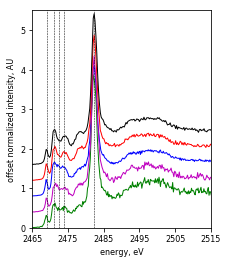

In [16]:
##full figure (publication size)
figsize(3.2,4)
plt.plot(df_17.index, df_17.iloc[:,0] + 0.8, 'b', linewidth = 1)
plt.plot(df_17.index, df_17.iloc[:,1] + 0, 'g', linewidth = 1)
plt.plot(df_18.index, df_18.iloc[:,0] + 0.4, 'm', linewidth = 1)
plt.plot(df_18.index, df_18.iloc[:,1] + 1.2, 'r', linewidth = 1)
plt.plot(df_18.index, df_18.iloc[:,2] + 1.6, 'k', linewidth = 1)

plt.ylabel('offset normalized intensity, AU')
plt.xlabel('energy, eV')
plt.xlim(2465,2515)   #not needed if subsample data above
plt.ylim(0,5.5)
xticks(np.arange(2465,2515.001, step=10))

axvline(2469.0, linewidth = 0.5, linestyle = '--', color = 'k')
axvline(2471.2, linewidth = 0.5, linestyle = '--', color = 'k')
axvline(2472.5, linewidth = 0.5, linestyle = '--', color = 'k')
axvline(2473.8, linewidth = 0.5, linestyle = '--', color = 'k')
axvline(2482.2, linewidth = 0.5, linestyle = '--', color = 'k')

##saving figure as svg and pdf
savefmt = os.path.join('Figure_4',
                       '{}{{:d}}.{{}}'.format(FIG_name))
i = 1
while os.path.exists(savefmt.format(i,'pdf')):
    i += 1
plt.savefig(savefmt.format(i,'pdf'), bbox_inches = 'tight')
plt.savefig(savefmt.format(i,'svg'), bbox_inches = 'tight')

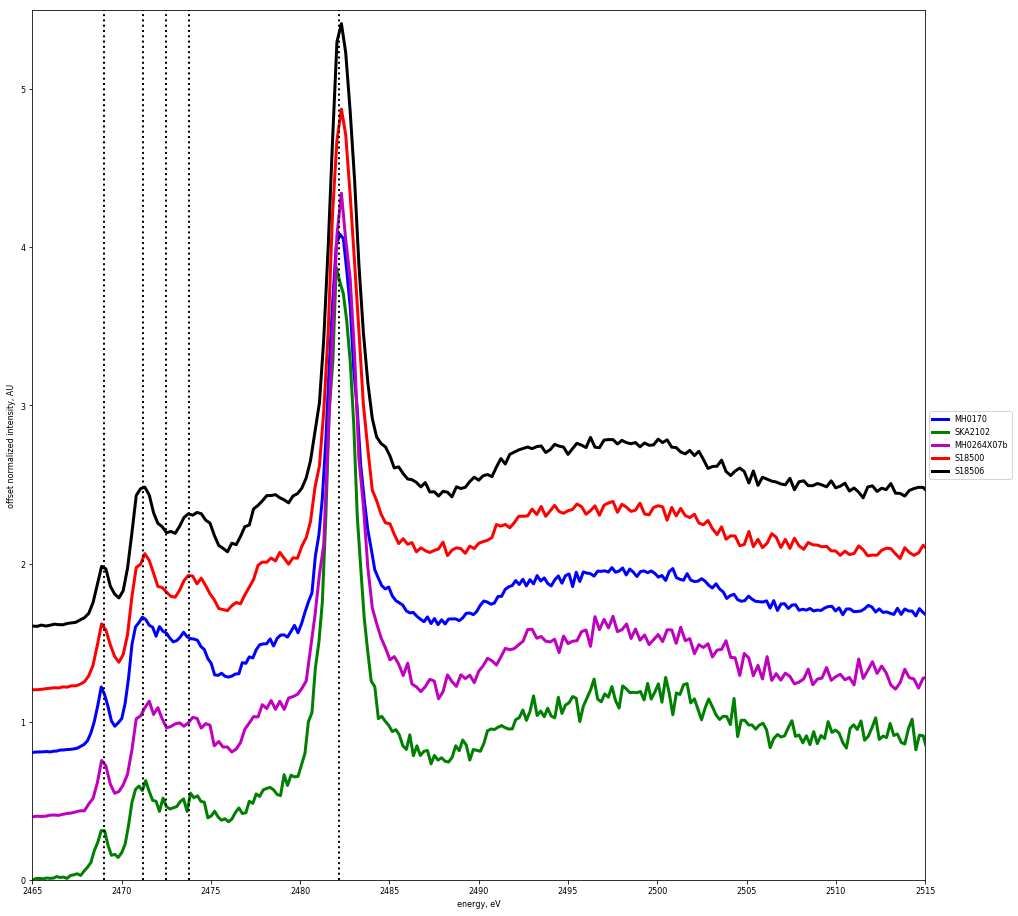

In [17]:
##big size, just to see, with legend...

figsize(16,16)
plt.plot(df_17.index, df_17.iloc[:,0] + 0.8, 'b', linewidth = 3)
plt.plot(df_17.index, df_17.iloc[:,1] + 0, 'g', linewidth = 3)
plt.plot(df_18.index, df_18.iloc[:,0] + 0.4, 'm', linewidth = 3)
plt.plot(df_18.index, df_18.iloc[:,1] + 1.2, 'r', linewidth = 3)
plt.plot(df_18.index, df_18.iloc[:,2] + 1.6, 'k', linewidth = 3)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('offset normalized intensity, AU')
plt.xlabel('energy, eV')
plt.xlim(2465,2515)   #not needed if subsample data above
plt.ylim(0,5.5)
xticks(np.arange(2465,2515.001, step=5))

axvline(2469.0, linewidth = 2, linestyle = ':', color = 'k')
axvline(2471.2, linewidth = 2, linestyle = ':', color = 'k')
axvline(2472.5, linewidth = 2, linestyle = ':', color = 'k')
axvline(2473.8, linewidth = 2, linestyle = ':', color = 'k')
axvline(2482.2, linewidth = 2, linestyle = ':', color = 'k')

### end